In [1]:
import re
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

In [2]:
# Load the File
df_str_rel = pd.read_csv('C:\\Users\\moink\\OneDrive\\Desktop\\ReserchProject\\Task A\\eng\\eng_train.csv', usecols=['PairID','Text','Score'])
df_str_rel.head()

,PairID,Text,Score
0,ENG-dev-0000,The story is gripping and interesting.\nIt's a...,0.64
1,ENG-dev-0001,The majority of Southeast Alaska 's area is pa...,0.61
2,ENG-dev-0002,and from your post i think you are to young to...,0.31
3,ENG-dev-0003,The film 's success also made Dreamworks Anima...,0.59
4,ENG-dev-0004,I am still confused about how I feel about thi...,0.50


In [3]:
len(df_str_rel)

250

In [4]:
# df_str_rel['Text'].values

In [5]:
# Creating a column "Split_Text" which is a list of two sentences.
df_str_rel['Split_Text'] = df_str_rel['Text'].apply(lambda x: x.split("\n"))
df_str_rel.head()

,PairID,Text,Score,Split_Text
0,ENG-dev-0000,The story is gripping and interesting.\nIt's a...,0.64,"[The story is gripping and interesting., It's ..."
1,ENG-dev-0001,The majority of Southeast Alaska 's area is pa...,0.61,[The majority of Southeast Alaska 's area is p...
2,ENG-dev-0002,and from your post i think you are to young to...,0.31,[and from your post i think you are to young t...
3,ENG-dev-0003,The film 's success also made Dreamworks Anima...,0.59,[The film 's success also made Dreamworks Anim...
4,ENG-dev-0004,I am still confused about how I feel about thi...,0.50,[I am still confused about how I feel about th...


In [6]:
def dice_score(s1,s2):
  s1 = s1.lower()
  s1_split = re.findall(r"\w+|[^\w\s]", s1, re.UNICODE)

  s2 = s2.lower()
  s2_split = re.findall(r"\w+|[^\w\s]", s2, re.UNICODE)

  dice_coef = len(set(s1_split).intersection(set(s2_split))) / (len(set(s1_split)) + len(set(s2_split)))
  return round(dice_coef, 2)

In [7]:
true_scores = df_str_rel['Score'].values
pred_scores = []

for index,row in df_str_rel.iterrows():

  s1,s2 = row["Text"].split("\n")

  # Overlap score
  pred_scores.append(dice_score(s1,s2))

# Calculating pearson correlation based on common words between sentences

In [8]:
# How well does the baseline correlate with human judgments?
print("Pearson Correlation:", round(spearmanr(true_scores,pred_scores)[0],2))

Pearson Correlation: 0.63


In [9]:
df_str_rel['Pred_Score'] = pred_scores
df_str_rel.head()

,PairID,Text,Score,Split_Text,Pred_Score
0,ENG-dev-0000,The story is gripping and interesting.\nIt's a...,0.64,"[The story is gripping and interesting., It's ...",0.17
1,ENG-dev-0001,The majority of Southeast Alaska 's area is pa...,0.61,[The majority of Southeast Alaska 's area is p...,0.31
2,ENG-dev-0002,and from your post i think you are to young to...,0.31,[and from your post i think you are to young t...,0.14
3,ENG-dev-0003,The film 's success also made Dreamworks Anima...,0.59,[The film 's success also made Dreamworks Anim...,0.22
4,ENG-dev-0004,I am still confused about how I feel about thi...,0.50,[I am still confused about how I feel about th...,0.12


In [10]:
df_str_rel[['PairID', 'Pred_Score']].to_csv('pred_eng.csv', index=False)

In [11]:
import pandas as pd

# Convert the DataFrame to a list of tuples
data = [tuple(x) for x in df_str_rel.to_records(index=False)]

# Now, data_list contains the data from the DataFrame as a list of tuples
len(data)

250

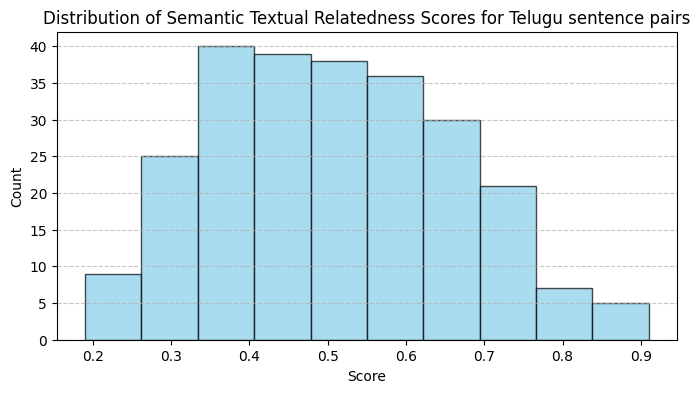

In [12]:
import matplotlib.pyplot as plt

# Extract the scores
scores = [item[2] for item in data]
# print(scores)
# Create a histogram to show the score distribution
plt.figure(figsize=(8, 4))
plt.hist(scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Semantic Textual Relatedness Scores for Telugu sentence pairs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
